In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\kernelbase.py:370: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


<Container object of 7 artists>

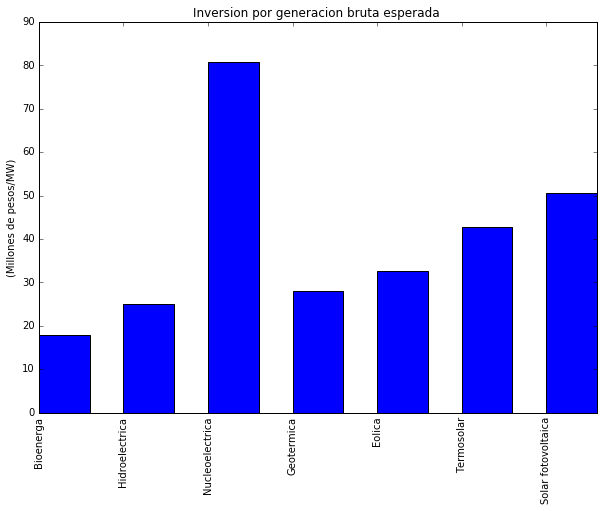

In [19]:
df= pd.read_csv("proyectos futuros inversion.csv",index_col=range(2),header=0)
tec=list(set(df.xs([2016]).index.tolist()))
dfi=pd.DataFrame(index=tec,columns=['Inversion por generacion bruta esperada (Millones de pesos/MW)'])
e='Inversion por generacion bruta esperada (Millones de pesos/MW)'
for t in tec:
    invt=[]
    gent=[]
    for a in range(2016,2031):
        try: invt.append(sum(df.xs([a,t])['Inversion'].tolist()))
        except KeyError: invt.append(0)
        try: gent.append(sum(df.xs([a,t])['Capacidad Bruta (MW)']))
        except KeyError: gent.append(0)
    dfi.set_value(t,e, sum(invt)/sum(gent))
plt.figure(1,figsize=(10,7),dpi = 200)
plt.xticks(range(len(tec)), dfi.index.tolist(), rotation='vertical')
plt.ylabel(e[40:])
plt.title(e[:40])
plt.bar(range(len(tec)),dfi[e].tolist(),.60,color='b') 

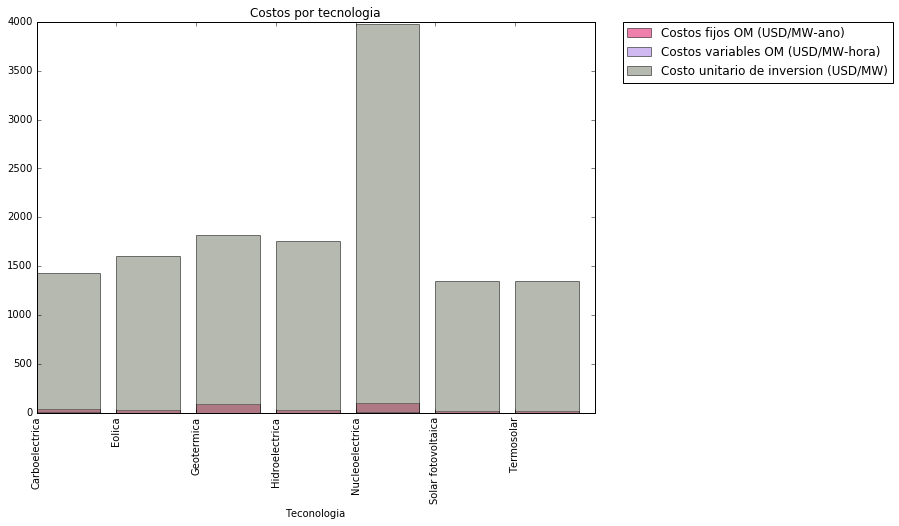

In [47]:
cos_tec=pd.read_csv('costo por tec.csv',header=0,index_col=0)
cos=cos_tec.columns.tolist()
plt.figure(2,figsize=(10,7),dpi = 200)
for i in cos:
    plt.bar(range(7),cos_tec.loc[:,i],alpha=.5,color=np.random.rand(3),label=i)
plt.title('Costos por tecnologia')
plt.xticks(range(7),cos_tec.index.tolist(),rotation='vertical')
plt.xlabel('Teconologia')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

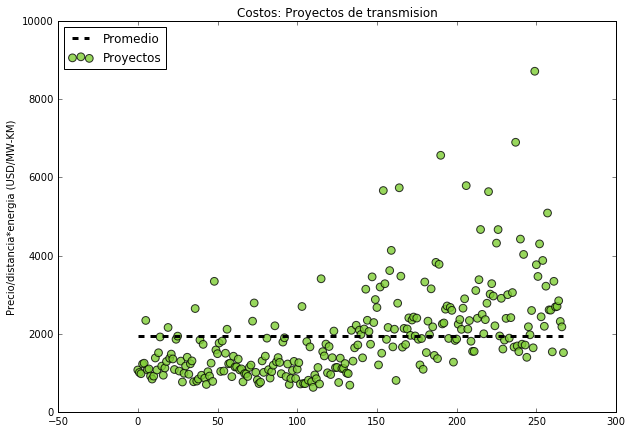

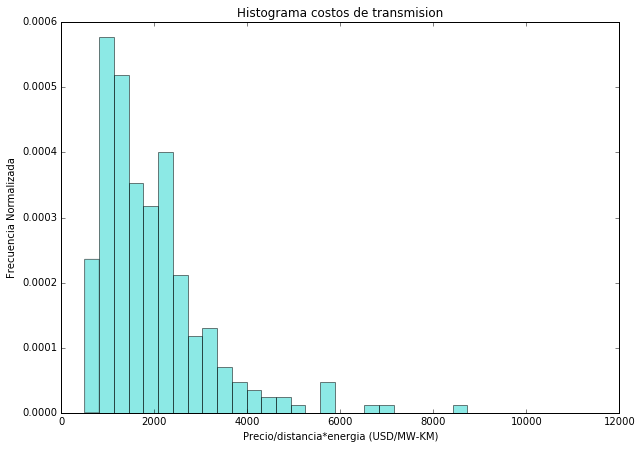

In [3]:
dft=pd.read_csv('Costo transmision proyectos.csv',header=0)
plt.figure(1,figsize=(10,7),dpi = 200)
plt.scatter(dft.index.tolist(),dft['Precio (USD/MW-KM)'].tolist(),s=60,alpha=.8,c=[np.random.rand(3)]*len(dft.index.tolist()),label='Proyectos')
plt.ylabel('Precio/distancia*energia (USD/MW-KM)')
plt.title('Costos de inversion: Proyectos de transmision')
plt.plot([0,267],[dft['Precio (USD/MW-KM)'].mean()]*2,'--',linewidth=3,c='k',label='Promedio')
plt.legend(loc=2)
plt.show()
plt.figure(2,figsize=(10,7),dpi = 200)
plt.hist(dft['Precio (USD/MW-KM)'].tolist(),bins=30,range=(500,10000),color='#1BD5CC',alpha=.5,normed=True)
plt.title('Histograma costos de transmision')
plt.xlabel('Precio/distancia*energia (USD/MW-KM)')
plt.ylabel('Frecuencia Normalizada')
plt.show()


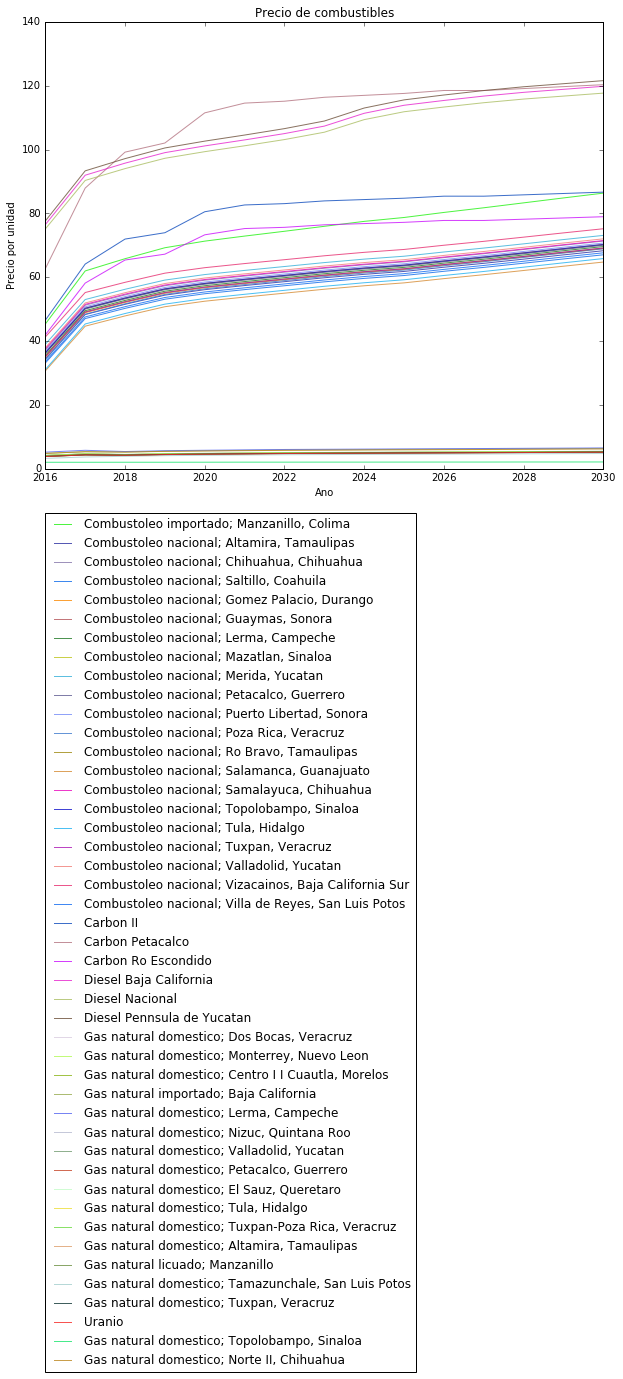

In [4]:
comb=pd.read_csv('tables/fuels.csv',header=0)

col=[]
for i in range (45):
    col.append(comb['Nombre2'].xs(i))
comb = comb.loc[:,['Ano','Precio']]
for i in range(0,len(col)-1):
    comb['Columna{0}'.format(i+2)]=pd.Series(comb.iloc[(i+1)*15:(i+2)*15,1].tolist())
comb=comb.iloc[0:15,:]
comb=comb.set_index('Ano')
comb.columns=col
plt.figure(1,figsize=(10,8),dpi=200)
for i in col:
    plt.plot(comb.index.tolist(),comb[i].tolist(),c=np.random.rand(3),alpha=.8,label=i)
plt.title('Precio de combustibles')
plt.xlabel('Ano')
plt.ylabel("Precio por unidad")
plt.legend(bbox_to_anchor=(0,-.1), loc=2, borderaxespad=0.)
plt.show()
    


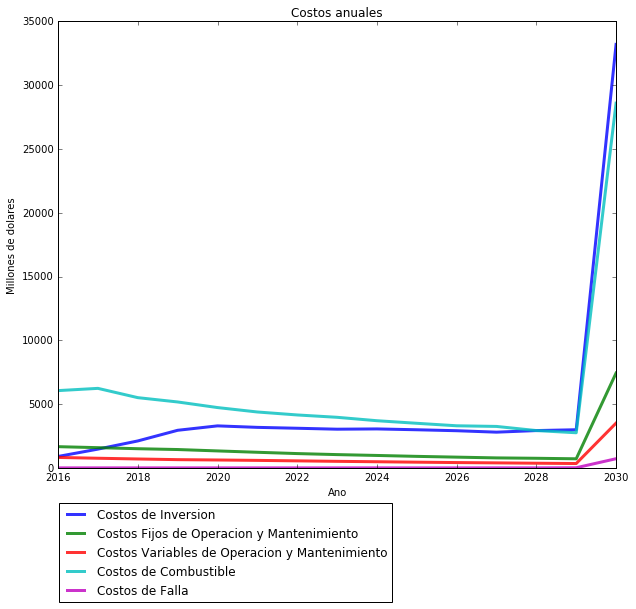

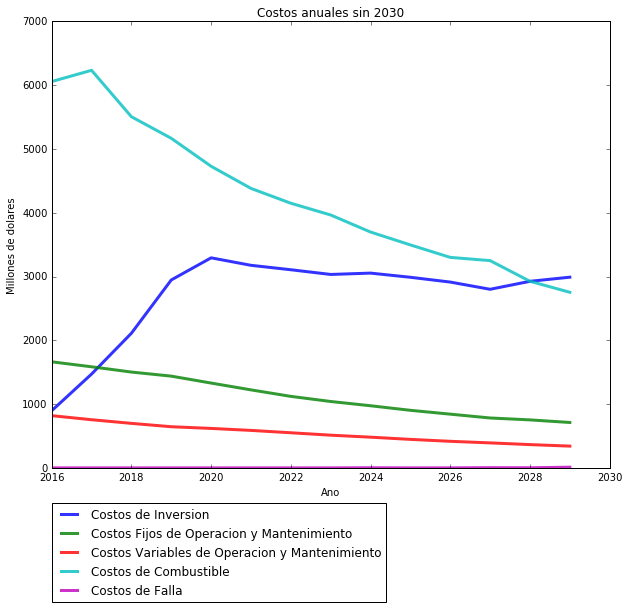

In [5]:
cost_sen=pd.read_csv('costo SEN.csv',header=0,index_col=0)
cost_sen=cost_sen.iloc[0:15,0:5]
plt.figure(1,figsize=(10,8),dpi=200)

for i in range(5):
    plt.plot(cost_sen.iloc[:,i],linewidth=3,alpha=.8)
plt.title('Costos anuales')
plt.xlabel('Ano')
plt.ylabel('Millones de dolares')
plt.legend(bbox_to_anchor=(0.30,-.30), loc=8, borderaxespad=0.0)
plt.show()
cost_sen=cost_sen.iloc[0:14,0:5]
plt.figure(2,figsize=(10,8),dpi=200)
for i in range(5):
    plt.plot(cost_sen.iloc[:,i],linewidth=3,alpha=.8)
plt.title('Costos anuales sin 2030')
plt.xlabel('Ano')
plt.ylabel('Millones de dolares')
plt.legend(bbox_to_anchor=(0.30,-.30), loc=8, borderaxespad=0.0)
plt.show()


2016     65158.32573
2017     71388.27321
2018     77918.52661
2019     86335.71884
2020     97120.05395
2021    105751.14410
2022    114386.75680
2023    124207.48680
2024    134812.61010
2025    141327.87840
2026    148216.82400
2027    154385.75010
2028    162854.85040
2029    170825.32210
2030    179775.67850
Name: Total, dtype: float64
[[ 0.82626457  0.99792694  0.24536007]
 [ 0.63721532  0.55411752  0.61745255]
 [ 0.45629536  0.50936874  0.25731534]
 [ 0.90771275  0.62798847  0.97638761]
 [ 0.88207671  0.97593803  0.9076484 ]
 [ 0.59725348  0.65011579  0.96232006]
 [ 0.27942144  0.52737369  0.13486162]
 [ 0.08930327  0.12978406  0.84942923]]


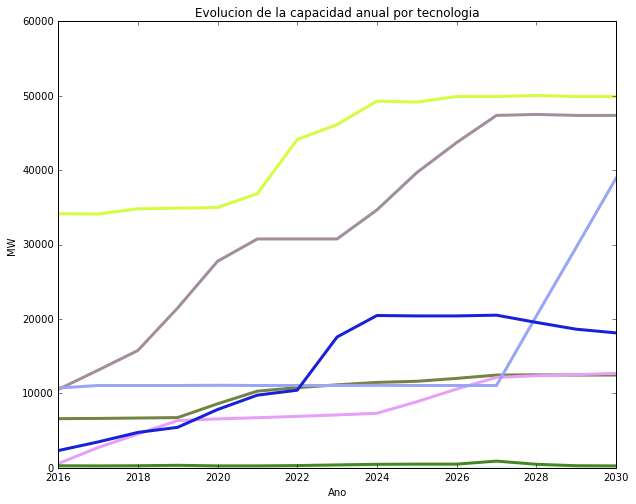

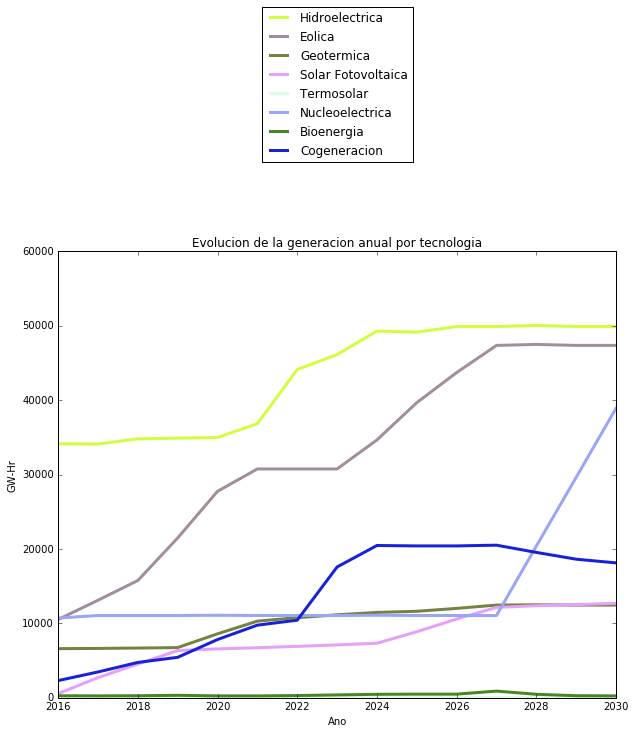

In [29]:
ev_cap=pd.read_csv('evolucion capacidad por tecnologia.csv',index_col=0,header=0)
ev_gen=pd.read_csv('evolucion generacion por tecnologia2.csv',index_col=0,header=0)
ev_cap=ev_cap.T
ev_gen=ev_gen.T
ev_cap=ev_cap.drop('Total',axis=1)
ev_gen=ev_gen.drop('Total',axis=1)
e=ev_cap.columns.tolist()
colors=np.random.rand(len(e),3)
plt.figure(4,figsize=(10,8),dpi=200)
for i in range(len(e)):
    plt.plot(ev_cap.iloc[:,i],c=colors[i],label=e[i],linewidth=3)
plt.title('Evolucion de la capacidad anual por tecnologia')
plt.xlabel('Ano')
plt.ylabel('MW')
plt.show()
plt.figure(4,figsize=(10,8),dpi=200)
e=ev_gen.columns.tolist()
for i in range(len(e)):
    plt.plot(ev_gen.iloc[:,i],c=colors[i],label=e[i],linewidth=3)
plt.title('Evolucion de la generacion anual por tecnologia')
plt.xlabel('Ano')
plt.ylabel('GW-Hr')
plt.legend(bbox_to_anchor=(0.5,1.2), loc=8, borderaxespad=0.0)
plt.show()

In [21]:
print np.arange(6)

[0 1 2 3 4 5]
